In [1]:
from keras.layers import Input,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import utils
from sklearn.metrics import confusion_matrix



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os

In [4]:
os.chdir('/content/drive/MyDrive/lung_cancer_dataset/positive')

In [5]:

from tensorflow.keras.utils import load_img,img_to_array

In [6]:
image=load_img('/content/drive/MyDrive/lung_cancer_dataset/positive/IM-0001-0001.jpeg')

In [7]:
image1 = img_to_array(image)

In [8]:
image1.ndim

3

In [9]:
image1.shape

(1317, 1857, 3)

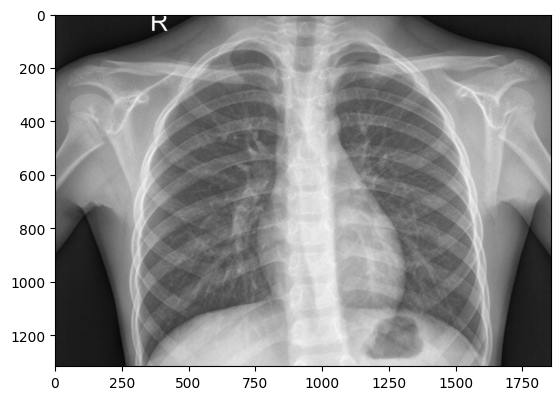

In [10]:
plt.imshow(image, cmap=plt.cm.binary)
plt.show()

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
inputs = keras.Input(shape=(200, 200, 3))
#x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
# x  = layers.Dropout(0.5)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x  = layers.Dropout(0.5)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x  = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 46, 46, 128)       7385

In [ ]:
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.RMSprop(learning_rate=1e-3), metrics=["accuracy"])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(f"/content/drive/MyDrive/Colab Notebooks/LungsCancer_splitted/train", image_size=(200, 200), batch_size=32)

test_dataset = image_dataset_from_directory( f"/content/drive/MyDrive/Colab Notebooks/LungsCancer_splitted/test", image_size=(200, 200), batch_size=32)

Found 375 files belonging to 2 classes.
Found 159 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 1000, 1000, 3)
labels batch shape: (32,)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="convnet_from_scratch.keras",
 save_best_only=True, )]

In [ ]:
#total 25.epochs
history = model.fit(
 train_dataset,
 epochs=25,
  callbacks=callbacks)

Epoch 1/25
12/12 [==============================] - ETA: 0s - loss: 19.8783 - accuracy: 0.5147

12/12 [==============================] - 4s 89ms/step - loss: 19.8783 - accuracy: 0.5147
Epoch 2/25
12/12 [==============================] - ETA: 0s - loss: 0.9027 - accuracy: 0.5360

12/12 [==============================] - 3s 98ms/step - loss: 0.9027 - accuracy: 0.5360
Epoch 3/25
12/12 [==============================] - ETA: 0s - loss: 0.7249 - accuracy: 0.5600

12/12 [==============================] - 3s 103ms/step - loss: 0.7249 - accuracy: 0.5600
Epoch 4/25
12/12 [==============================] - ETA: 0s - loss: 0.6562 - accuracy: 0.6240

12/12 [==============================] - 2s 98ms/step - loss: 0.6562 - accuracy: 0.6240
Epoch 5/25
12/12 [==============================] - ETA: 0s - loss: 0.6186 - accuracy: 0.6667

12/12 [==============================] - 2s 100ms/step - loss: 0.6186 - accuracy: 0.6667
Epoch 6/25
11/12 [==========================>...] - ETA: 0s - loss: 0.6184 - accuracy: 0.6705

12/12 [==============================] - 2s 98ms/step - loss: 0.6222 - accuracy: 0.6693
Epoch 7/25
12/12 [==============================] - ETA: 0s - loss: 0.5502 - accuracy: 0.7280

12/12 [==============================] - 3s 139ms/step - loss: 0.5502 - accuracy: 0.7280
Epoch 8/25
12/12 [==============================] - ETA: 0s - loss: 0.5041 - accuracy: 0.7787

12/12 [==============================] - 3s 101ms/step - loss: 0.5041 - accuracy: 0.7787
Epoch 9/25
12/12 [==============================] - ETA: 0s - loss: 0.4093 - accuracy: 0.8187

12/12 [==============================] - 3s 100ms/step - loss: 0.4093 - accuracy: 0.8187
Epoch 10/25
12/12 [==============================] - ETA: 0s - loss: 0.3791 - accuracy: 0.8267

12/12 [==============================] - 2s 100ms/step - loss: 0.3791 - accuracy: 0.8267
Epoch 11/25
12/12 [==============================] - ETA: 0s - loss: 0.3291 - accuracy: 0.8613

12/12 [==============================] - 2s 99ms/step - loss: 0.3291 - accuracy: 0.8613
Epoch 12/25
12/12 [==============================] - ETA: 0s - loss: 0.3403 - accuracy: 0.8533

12/12 [==============================] - 3s 142ms/step - loss: 0.3403 - accuracy: 0.8533
Epoch 13/25
12/12 [==============================] - ETA: 0s - loss: 0.2963 - accuracy: 0.8693

12/12 [==============================] - 3s 103ms/step - loss: 0.2963 - accuracy: 0.8693
Epoch 14/25
12/12 [==============================] - ETA: 0s - loss: 0.3046 - accuracy: 0.8613

12/12 [==============================] - 2s 98ms/step - loss: 0.3046 - accuracy: 0.8613
Epoch 15/25
12/12 [==============================] - ETA: 0s - loss: 0.2427 - accuracy: 0.8907

12/12 [==============================] - 3s 100ms/step - loss: 0.2427 - accuracy: 0.8907
Epoch 16/25
12/12 [==============================] - ETA: 0s - loss: 0.2275 - accuracy: 0.8987

12/12 [==============================] - 3s 121ms/step - loss: 0.2275 - accuracy: 0.8987
Epoch 17/25
12/12 [==============================] - ETA: 0s - loss: 0.1900 - accuracy: 0.9200

12/12 [==============================] - 3s 104ms/step - loss: 0.1900 - accuracy: 0.9200
Epoch 18/25
12/12 [==============================] - ETA: 0s - loss: 0.1998 - accuracy: 0.9173

12/12 [==============================] - 3s 100ms/step - loss: 0.1998 - accuracy: 0.9173
Epoch 19/25
11/12 [==========================>...] - ETA: 0s - loss: 0.1978 - accuracy: 0.9261

12/12 [==============================] - 2s 98ms/step - loss: 0.2037 - accuracy: 0.9227
Epoch 20/25
12/12 [==============================] - ETA: 0s - loss: 0.2032 - accuracy: 0.9173

12/12 [==============================] - 3s 127ms/step - loss: 0.2032 - accuracy: 0.9173
Epoch 21/25
12/12 [==============================] - ETA: 0s - loss: 0.1864 - accuracy: 0.9333

12/12 [==============================] - 4s 106ms/step - loss: 0.1864 - accuracy: 0.9333
Epoch 22/25
12/12 [==============================] - ETA: 0s - loss: 0.1375 - accuracy: 0.9467

12/12 [==============================] - 2s 100ms/step - loss: 0.1375 - accuracy: 0.9467
Epoch 23/25
12/12 [==============================] - ETA: 0s - loss: 0.1595 - accuracy: 0.9253

12/12 [==============================] - 3s 103ms/step - loss: 0.1595 - accuracy: 0.9253
Epoch 24/25
12/12 [==============================] - ETA: 0s - loss: 0.1511 - accuracy: 0.9520

12/12 [==============================] - 2s 98ms/step - loss: 0.1511 - accuracy: 0.9520
Epoch 25/25
12/12 [==============================] - ETA: 0s - loss: 0.1534 - accuracy: 0.9467

12/12 [==============================] - 3s 142ms/step - loss: 0.1534 - accuracy: 0.9467


In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

5/5 [==============================] - 1s 23ms/step - loss: 0.5036 - accuracy: 0.7925
Test accuracy: 0.792


In [ ]:
ypred =  model.predict(test_dataset)

5/5 [==============================] - 1s 18ms/step


In [ ]:
ypred = [1 if p>0.5 else 0 for p in ypred]


In [ ]:
pred_neg=0
pred_pos=0
for y in ypred:
  if y==0:
    pred_neg +=1
  else:
    pred_pos +=1

print(f"pred_neg {pred_neg}, pred_pos {pred_pos}")

pred_neg 105, pred_pos 54


In [ ]:
actual_neg=len(os.listdir('/content/drive/MyDrive/Colab Notebooks/LungsCancer_splitted/test/negative'))

90

In [ ]:
actual_pos=len(os.listdir('/content/drive/MyDrive/Colab Notebooks/LungsCancer_splitted/test/positive'))
actual_pos

69

In [ ]:
# Transfer Learning

In [12]:
conv_base = keras.applications.vgg16.VGG16(
 weights="imagenet",
 include_top=False)
conv_base.trainable = False

58889256/58889256 [==============================] - 2s 0us/step


In [13]:
conv_base.trainable = True

In [14]:
print("This is the number of trainable weights "
 "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [15]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [16]:
conv_base.trainable = False

In [17]:
print("This is the number of trainable weights "
 "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [18]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [19]:
data_augmentation = keras.Sequential(
 [
 layers.RandomFlip("horizontal"),
 layers.RandomRotation(0.1),
 layers.RandomZoom(0.2),
 ]
)

In [20]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
 optimizer="adam",
 metrics=["accuracy"])

In [21]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="feature_extraction_with_data_augmentation.keras",
 save_best_only=True
 )
]

In [22]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(f"/content/drive/MyDrive/Colab Notebooks/LungsCancer_splitted/train", image_size=(180, 180), batch_size=32)

test_dataset = image_dataset_from_directory( f"/content/drive/MyDrive/Colab Notebooks/LungsCancer_splitted/test", image_size=(180, 180), batch_size=32)

Found 375 files belonging to 2 classes.
Found 159 files belonging to 2 classes.


In [23]:
history = model.fit(
 train_dataset,
 epochs=15,
  callbacks=callbacks)

Epoch 1/15
12/12 [==============================] - ETA: 0s - loss: 10.6003 - accuracy: 0.7547

12/12 [==============================] - 77s 991ms/step - loss: 10.6003 - accuracy: 0.7547
Epoch 2/15
12/12 [==============================] - ETA: 0s - loss: 15.3689 - accuracy: 0.8080

12/12 [==============================] - 3s 123ms/step - loss: 15.3689 - accuracy: 0.8080
Epoch 3/15
12/12 [==============================] - ETA: 0s - loss: 12.9548 - accuracy: 0.8587

12/12 [==============================] - 4s 165ms/step - loss: 12.9548 - accuracy: 0.8587
Epoch 4/15
12/12 [==============================] - ETA: 0s - loss: 9.7903 - accuracy: 0.8667 

12/12 [==============================] - 3s 121ms/step - loss: 9.7903 - accuracy: 0.8667
Epoch 5/15
12/12 [==============================] - ETA: 0s - loss: 8.4262 - accuracy: 0.8667

12/12 [==============================] - 3s 119ms/step - loss: 8.4262 - accuracy: 0.8667
Epoch 6/15
12/12 [==============================] - ETA: 0s - loss: 6.8658 - accuracy: 0.8907

12/12 [==============================] - 3s 147ms/step - loss: 6.8658 - accuracy: 0.8907
Epoch 7/15
12/12 [==============================] - ETA: 0s - loss: 10.5725 - accuracy: 0.8507

12/12 [==============================] - 3s 117ms/step - loss: 10.5725 - accuracy: 0.8507
Epoch 8/15
12/12 [==============================] - ETA: 0s - loss: 8.6314 - accuracy: 0.8880

12/12 [==============================] - 3s 125ms/step - loss: 8.6314 - accuracy: 0.8880
Epoch 9/15
12/12 [==============================] - ETA: 0s - loss: 5.9855 - accuracy: 0.9067

12/12 [==============================] - 3s 126ms/step - loss: 5.9855 - accuracy: 0.9067
Epoch 10/15
12/12 [==============================] - ETA: 0s - loss: 5.3203 - accuracy: 0.9280

12/12 [==============================] - 4s 164ms/step - loss: 5.3203 - accuracy: 0.9280
Epoch 11/15
12/12 [==============================] - ETA: 0s - loss: 4.3483 - accuracy: 0.9067

12/12 [==============================] - 3s 121ms/step - loss: 4.3483 - accuracy: 0.9067
Epoch 12/15
12/12 [==============================] - ETA: 0s - loss: 7.3912 - accuracy: 0.8907

12/12 [==============================] - 3s 126ms/step - loss: 7.3912 - accuracy: 0.8907
Epoch 13/15
12/12 [==============================] - ETA: 0s - loss: 6.2264 - accuracy: 0.9333

12/12 [==============================] - 3s 123ms/step - loss: 6.2264 - accuracy: 0.9333
Epoch 14/15
12/12 [==============================] - ETA: 0s - loss: 5.2496 - accuracy: 0.9333

12/12 [==============================] - 4s 162ms/step - loss: 5.2496 - accuracy: 0.9333
Epoch 15/15
12/12 [==============================] - ETA: 0s - loss: 6.5874 - accuracy: 0.8907

12/12 [==============================] - 3s 119ms/step - loss: 6.5874 - accuracy: 0.8907


In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

5/5 [==============================] - 1s 91ms/step - loss: 24.3294 - accuracy: 0.7358
Test accuracy: 0.736


In [ ]:
# Fine-Tuning

In [24]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
 layer.trainable = False

In [25]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [26]:
model.compile(loss="binary_crossentropy",
 optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
 metrics=["accuracy"])

In [27]:
history = model.fit(
 train_dataset,
 epochs=30,
  callbacks=callbacks)

Epoch 1/30
12/12 [==============================] - ETA: 0s - loss: 3.7283 - accuracy: 0.9200

12/12 [==============================] - 8s 143ms/step - loss: 3.7283 - accuracy: 0.9200
Epoch 2/30
12/12 [==============================] - ETA: 0s - loss: 2.1280 - accuracy: 0.9493

12/12 [==============================] - 3s 143ms/step - loss: 2.1280 - accuracy: 0.9493
Epoch 3/30
12/12 [==============================] - ETA: 0s - loss: 3.2548 - accuracy: 0.9440

12/12 [==============================] - 5s 151ms/step - loss: 3.2548 - accuracy: 0.9440
Epoch 4/30
12/12 [==============================] - ETA: 0s - loss: 2.3759 - accuracy: 0.9493

12/12 [==============================] - 3s 134ms/step - loss: 2.3759 - accuracy: 0.9493
Epoch 5/30
12/12 [==============================] - ETA: 0s - loss: 3.5266 - accuracy: 0.9467

12/12 [==============================] - 3s 140ms/step - loss: 3.5266 - accuracy: 0.9467
Epoch 6/30
12/12 [==============================] - ETA: 0s - loss: 2.1959 - accuracy: 0.9387

12/12 [==============================] - 3s 159ms/step - loss: 2.1959 - accuracy: 0.9387
Epoch 7/30
12/12 [==============================] - ETA: 0s - loss: 2.5746 - accuracy: 0.9280

12/12 [==============================] - 3s 136ms/step - loss: 2.5746 - accuracy: 0.9280
Epoch 8/30
12/12 [==============================] - ETA: 0s - loss: 2.0110 - accuracy: 0.9253

12/12 [==============================] - 3s 139ms/step - loss: 2.0110 - accuracy: 0.9253
Epoch 9/30
12/12 [==============================] - ETA: 0s - loss: 2.1524 - accuracy: 0.9387

12/12 [==============================] - 3s 137ms/step - loss: 2.1524 - accuracy: 0.9387
Epoch 10/30
12/12 [==============================] - ETA: 0s - loss: 1.6311 - accuracy: 0.9307

12/12 [==============================] - 4s 182ms/step - loss: 1.6311 - accuracy: 0.9307
Epoch 11/30
12/12 [==============================] - ETA: 0s - loss: 1.1434 - accuracy: 0.9493

12/12 [==============================] - 3s 134ms/step - loss: 1.1434 - accuracy: 0.9493
Epoch 12/30
12/12 [==============================] - ETA: 0s - loss: 1.0000 - accuracy: 0.9520

12/12 [==============================] - 3s 145ms/step - loss: 1.0000 - accuracy: 0.9520
Epoch 13/30
12/12 [==============================] - ETA: 0s - loss: 1.4264 - accuracy: 0.9333

12/12 [==============================] - 4s 171ms/step - loss: 1.4264 - accuracy: 0.9333
Epoch 14/30
12/12 [==============================] - ETA: 0s - loss: 0.4903 - accuracy: 0.9733

12/12 [==============================] - 4s 130ms/step - loss: 0.4903 - accuracy: 0.9733
Epoch 15/30
12/12 [==============================] - ETA: 0s - loss: 1.1167 - accuracy: 0.9493

12/12 [==============================] - 3s 136ms/step - loss: 1.1167 - accuracy: 0.9493
Epoch 16/30
12/12 [==============================] - ETA: 0s - loss: 1.0546 - accuracy: 0.9627

12/12 [==============================] - 3s 135ms/step - loss: 1.0546 - accuracy: 0.9627
Epoch 17/30
12/12 [==============================] - ETA: 0s - loss: 0.9630 - accuracy: 0.9333

12/12 [==============================] - 3s 143ms/step - loss: 0.9630 - accuracy: 0.9333
Epoch 18/30
12/12 [==============================] - ETA: 0s - loss: 0.8233 - accuracy: 0.9653

12/12 [==============================] - 5s 150ms/step - loss: 0.8233 - accuracy: 0.9653
Epoch 19/30
12/12 [==============================] - ETA: 0s - loss: 0.4265 - accuracy: 0.9787

12/12 [==============================] - 3s 136ms/step - loss: 0.4265 - accuracy: 0.9787
Epoch 20/30
12/12 [==============================] - ETA: 0s - loss: 0.6103 - accuracy: 0.9707

12/12 [==============================] - 3s 137ms/step - loss: 0.6103 - accuracy: 0.9707
Epoch 21/30
12/12 [==============================] - ETA: 0s - loss: 0.8470 - accuracy: 0.9573

12/12 [==============================] - 3s 139ms/step - loss: 0.8470 - accuracy: 0.9573
Epoch 22/30
12/12 [==============================] - ETA: 0s - loss: 1.1024 - accuracy: 0.9520

12/12 [==============================] - 3s 137ms/step - loss: 1.1024 - accuracy: 0.9520
Epoch 23/30
12/12 [==============================] - ETA: 0s - loss: 0.3164 - accuracy: 0.9680

12/12 [==============================] - 3s 139ms/step - loss: 0.3164 - accuracy: 0.9680
Epoch 24/30
12/12 [==============================] - ETA: 0s - loss: 0.5503 - accuracy: 0.9627

12/12 [==============================] - 3s 138ms/step - loss: 0.5503 - accuracy: 0.9627
Epoch 25/30
12/12 [==============================] - ETA: 0s - loss: 0.6667 - accuracy: 0.9600

12/12 [==============================] - 4s 174ms/step - loss: 0.6667 - accuracy: 0.9600
Epoch 26/30
12/12 [==============================] - ETA: 0s - loss: 0.7215 - accuracy: 0.9627

12/12 [==============================] - 3s 137ms/step - loss: 0.7215 - accuracy: 0.9627
Epoch 27/30
12/12 [==============================] - ETA: 0s - loss: 0.6756 - accuracy: 0.9493

12/12 [==============================] - 3s 135ms/step - loss: 0.6756 - accuracy: 0.9493
Epoch 28/30
12/12 [==============================] - ETA: 0s - loss: 0.4707 - accuracy: 0.9653

12/12 [==============================] - 4s 171ms/step - loss: 0.4707 - accuracy: 0.9653
Epoch 29/30
12/12 [==============================] - ETA: 0s - loss: 0.1897 - accuracy: 0.9787

12/12 [==============================] - 4s 133ms/step - loss: 0.1897 - accuracy: 0.9787
Epoch 30/30
12/12 [==============================] - ETA: 0s - loss: 0.4805 - accuracy: 0.9680

12/12 [==============================] - 3s 139ms/step - loss: 0.4805 - accuracy: 0.9680


In [1]:

test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

NameError: ignored

In [ ]:
 #Auto Keras Implementation

In [ ]:
!pip install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.5/573.5 kB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 924.6/924.6 kB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 108.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 115.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 47.0 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: t

In [ ]:
import autokeras as ak

Using TensorFlow backend


In [ ]:
clf = ak.ImageClassifier()

In [ ]:
clf.fit(train_dataset)

Trial 8 Complete [00h 11m 27s]
val_loss: 0.6820026636123657

Best val_loss So Far: 0.6158904433250427
Total elapsed time: 02h 22m 46s

Search: Running Trial #9

Value             |Best Value So Far |Hyperparameter
True              |True              |image_block_1/normalize
True              |True              |image_block_1/augment
efficient         |efficient         |image_block_1/block_type
global_avg        |global_avg        |classification_head_1/spatial_reduction_1/reduction_type
0.25              |0                 |classification_head_1/dropout
adam              |adam              |optimizer
2e-05             |2e-05             |learning_rate
0                 |0                 |image_block_1/image_augmentation_1/translation_factor
True              |True              |image_block_1/image_augmentation_1/horizontal_flip
False             |False             |image_block_1/image_augmentation_1/vertical_flip
0                 |0                 |image_block_1/image_augmentation